# Iris

In [1]:
cd ..

/Users/vincent/Projects/saplings


In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
from sklearn.datasets import load_iris

from saplings.criteria import Gini
from saplings.decision_tree import DecisionTree
from saplings.metrics import accuracy_score
from saplings.training import train_test_split
from saplings.plot import plot_tree_depth, plot_train_test
from saplings.random_forest import RandomForest

In [4]:
iris = load_iris()
X = iris.data 
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Visualizing tree depth

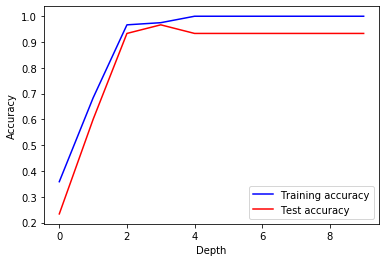

In [5]:
plot_tree_depth(Gini(), 10, X_train, y_train, X_test, y_test)

# Visualizing splits

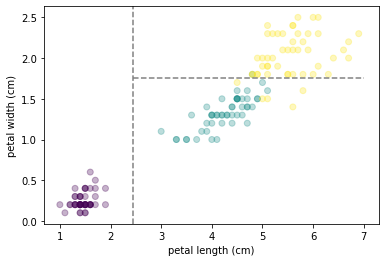

In [6]:
model = DecisionTree(Gini(), max_depth=4).fit(X_train, y_train)
feature_names = iris.feature_names
split = model.tree

plt.scatter(X[:, split.feature], X[:, 3], c=y, alpha=0.3, cmap='viridis')
plt.xlabel(feature_names[split.feature])
plt.ylabel(feature_names[3])
plt.axvline(2.45, color="gray", linestyle="--")
plt.hlines(1.75, xmin=2.45, xmax=7, color="gray", linestyle="--")

In [7]:
node = model.tree
node.feature

# find the leafs of a tree
from saplings.tree import Leaf

def find_leaves(tree, leafs=None):
    if leaves is None:
        leaves = []
    
    if isinstance(tree, Leaf):
        leaves.append(tree)
    else:    
        find_leaves(tree.left, leaves)
        find_leaves(tree.right, leaves)
    
    return leaves

# Random forest

In [18]:
model = RandomForest(Gini(), 100, n_features=5, n_samples=1.0, replace=True, max_depth=4)
model.fit(X_train, y_train)

predictions = np.array([estimator.predict(X_test) for estimator in model.estimators])

acc_mean = np.mean([accuracy_score(y_test, y_pred) for y_pred in predictions])
acc_rf = accuracy_score(y_test, model.predict(X_test))
    
print(f"mean acc = {acc_mean:.4f}, model acc = {acc_rf:.4f}")

mean acc = 0.9390, model acc = 0.9667
